In [228]:
# Random Forest Classifier

# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [229]:
# Importing the datasets

dataset = pd.read_csv("data_for_labeling.csv")
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:,-1]

#data to be split into X features set and Y label set 

In [230]:
dataset

0  1  2  3  4  5  6  7  8  9  ...  5/1/2019  6/1/2017  6/1/2019  \
0      0  0  0  0  0  0  0  0  0  0  ...         0        11        11   
1      0  0  0  0  0  0  0  0  0  0  ...         0         2         0   
2      0  0  0  0  0  0  0  0  0  0  ...         0       136       136   
3      0  0  0  0  0  0  0  0  0  0  ...         0         1         1   
4      0  0  0  0  0  0  0  0  0  0  ...       138         0         6   
5      0  0  0  0  0  0  0  0  0  0  ...         0         2         2   
6      0  0  0  0  0  0  0  0  0  0  ...        10         3        17   
7      0  0  0  0  0  0  0  0  0  0  ...         0         1         1   
8      0  0  0  0  0  0  0  0  0  0  ...         6         3         0   
9      0  0  0  0  0  0  0  0  0  0  ...         0         4         0   
10     0  0  0  0  0  0  0  0  0  0  ...         1         7         0   
11     0  0  0  0  0  0  0  0  0  0  ...        71        50        79   
12     0  0  0  0  0  0  0  0  0  0  ...         0        24        24   
13     0  0  0  0  0  0  0  0  0  0  ...         9        30        15   
14     1  0  0  0  0  0  0  0  0  0  ...         0         2         2   
15     1  0  0  0  0  0  0  0  0  0  ...         1         1         1   
16     1  0  0  0  0  0  0  0  0  0  ...         2         2         2   
17     1  0  0  0  0  0  0  0  0  0  ...         1         1         1   
18     1  0  0  0  0  0  0  0  0  0  ...         1         1         0   
19     1  0  0  0  0  0  0  0  0  0  ...         0         1         0   
20     1  0  0  0  0  0  0  0  0  0  ...         0         0         0   
21     1  0  0  0  0  0  0  0  0  0  ...         2         3         2   
22     1  0  0  0  0  0  0  0  0  0  ...         1         1         1   
23     1  0  0  0  0  0  0  0  0  0  ...         2         2         1   
24     1  0  0  0  0  0  0  0  0  0  ...         1         1         1   
25     1  0  0  0  0  0  0  0  0  0  ...         6         6         6   
26     1  0  0  0  0  0  0  0  0  0  ...         1         1         1   
27     1  0  0  0  0  0  0  0  0  0  ...         1         1         1   
28     1  0  0  0  0  0  0  0  0  0  ...         1         0         0   
29     1  0  0  0  0  0  0  0  0  0  ...         3         2         2   
...   .. .. .. .. .. .. .. .. .. ..  ...       ...       ...       ...   
28330  0  0  0  0  0  0  0  0  0  0  ...        56        56        56   
28331  0  0  0  0  0  0  0  0  0  0  ...       614       614       614   
28332  0  0  0  0  0  0  0  0  0  0  ...        29        29        29   
28333  0  0  0  0  0  0  0  0  0  0  ...        41        41        41   
28334  0  0  0  0  0  0  0  0  0  0  ...       120       120       120   
28335  0  0  0  0  0  0  0  0  0  0  ...       190       190       190   
28336  0  0  0  0  0  0  0  0  0  0  ...         9         9         9   
28337  0  0  0  0  0  0  0  0  0  0  ...       710       710       710   
28338  0  0  0  0  0  0  0  0  0  0  ...         0        69        69   
28339  0  0  0  0  0  0  0  0  0  0  ...        50        50        50   
28340  0  0  0  0  0  0  0  0  0  0  ...        30        30        30   
28341  0  0  0  0  0  0  0  0  0  0  ...       358       358       358   
28342  0  0  0  0  0  0  0  0  0  0  ...       139       139       139   
28343  0  0  0  0  0  0  0  0  0  0  ...        51        51        51   
28344  0  0  0  0  0  0  0  0  0  0  ...       210       210       210   
28345  0  0  0  0  0  0  0  0  0  0  ...        87        87        87   
28346  0  0  0  0  0  0  0  0  0  0  ...         5         5         5   
28347  0  0  0  0  0  0  0  0  0  0  ...       297       297       297   
28348  0  0  0  0  0  0  0  0  0  0  ...      1021      1021      1021   
28349  0  0  0  0  0  0  0  0  0  0  ...       143       143       143   
28350  0  0  0  0  0  0  0  0  0  0  ...         4         4         4   
28351  0  0  0  0  0  0  0  0  0  0  ...        78        78        78   
28352  0  0

In [231]:
from sklearn.svm import SVC
from scikitplot.metrics import plot_roc_curve
from sklearn.datasets import load_wine 
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.4, random_state = 0)

In [232]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

/home/micnice/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/micnice/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/micnice/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [233]:
# Fitting the classifier into the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 77, criterion = 'entropy', random_state = 0)
history = classifier.fit(X_Train,Y_Train)

#proc = plot_roc_curve(classifier, X_Test, Y_Test)

In [234]:
import matplotlib.pyplot as plt
rfc_disp = plot_roc_curve(classifier, X_Test, Y_Test)
rfc_disp.figure_.suptitle("ROC curve comparison")
plot.show()

/home/micnice/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


TypeError: '<' not supported between instances of 'DecisionTreeClassifier' and 'DecisionTreeClassifier'

In [235]:
def plot_decision_boundary(func, X, y, figsize=(9, 6)):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = func(ab)
    cc = c.reshape(aa.shape)

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    fig, ax = plt.subplots(figsize=figsize)
    contour = plt.contourf(aa, bb, cc, cmap=cm, alpha=0.8)
    
    ax_c = fig.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)

def plot_multiclass_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()], verbose=0)
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
def plot_data(X, y, figsize=None):
    if not figsize:
        figsize = (8, 6)
    plt.figure(figsize=figsize)
    plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5, label=0)
    plt.plot(X[y==1, 0], X[y==1, 1], 'ob', alpha=0.5, label=1)
    plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
    plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
    plt.legend()

def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['acc'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])
    
def plot_confusion_matrix(model, X, y):
    y_pred = model.predict_classes(X, verbose=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)

def plot_compare_histories(history_list, name_list, plot_accuracy=True):
    dflist = []
    for history in history_list:
        h = {key: val for key, val in history.history.items() if not key.startswith('val_')}
        dflist.append(pd.DataFrame(h, index=history.epoch))

    historydf = pd.concat(dflist, axis=1)

    metrics = dflist[0].columns
    idx = pd.MultiIndex.from_product([name_list, metrics], names=['model', 'metric'])
    historydf.columns = idx
    
    plt.figure(figsize=(6, 8))

    ax = plt.subplot(211)
    historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
    plt.title("Loss")
    
    if plot_accuracy:
        ax = plt.subplot(212)
        historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
        plt.title("Accuracy")
        plt.xlabel("Epochs")

    plt.tight_layout()
    
def make_sine_wave():
    c = 3
    num = 2400
    step = num/(c*4)
    np.random.seed(0)
    x0 = np.linspace(-c*np.pi, c*np.pi, num)
    x1 = np.sin(x0)
    noise = np.random.normal(0, 0.1, num) + 0.1
    noise = np.sign(x1) * np.abs(noise)
    x1  = x1 + noise
    x0 = x0 + (np.asarray(range(num)) / step) * 0.3
    X = np.column_stack((x0, x1))
    y = np.asarray([int((i/step)%2==1) for i in range(len(x0))])
    return X, y

def make_multiclass(N=500, D=2, K=3):
    """
    N: number of points per class
    D: dimensionality
    K: number of classes
    """
    np.random.seed(0)
    X = np.zeros((N*K, D))
    y = np.zeros(N*K)
    for j in range(K):
        ix = range(N*j, N*(j+1))
        # radius
        r = np.linspace(0.0,1,N)
        # theta
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    fig = plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    return X, y

In [236]:
plot_loss_accuracy(history)

AttributeError: 'RandomForestClassifier' object has no attribute 'history'

In [237]:
# Predicting the test set results

Y_Pred = classifier.predict(X_Test)

In [238]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)

In [239]:
#Visualizations
cm

array([[10032,    25,     4],
       [   37,  1034,    27],
       [    3,    24,   158]])

In [240]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_Test, Y_Pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_Test, Y_Pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_Test, Y_Pred)))

Mean Absolute Error: 0.011195345557122708
Mean Squared Error: 0.012429478138222849
Root Mean Squared Error: 0.11148756943364964


In [241]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(Y_Test,Y_Pred))

[[10032    25     4]
 [   37  1034    27]
 [    3    24   158]]


In [242]:
print(classification_report(Y_Test,Y_Pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10061
           1       0.95      0.94      0.95      1098
           2       0.84      0.85      0.84       185

   micro avg       0.99      0.99      0.99     11344
   macro avg       0.93      0.93      0.93     11344
weighted avg       0.99      0.99      0.99     11344



In [243]:
print(accuracy_score(Y_Test, Y_Pred))

0.9894217207334274


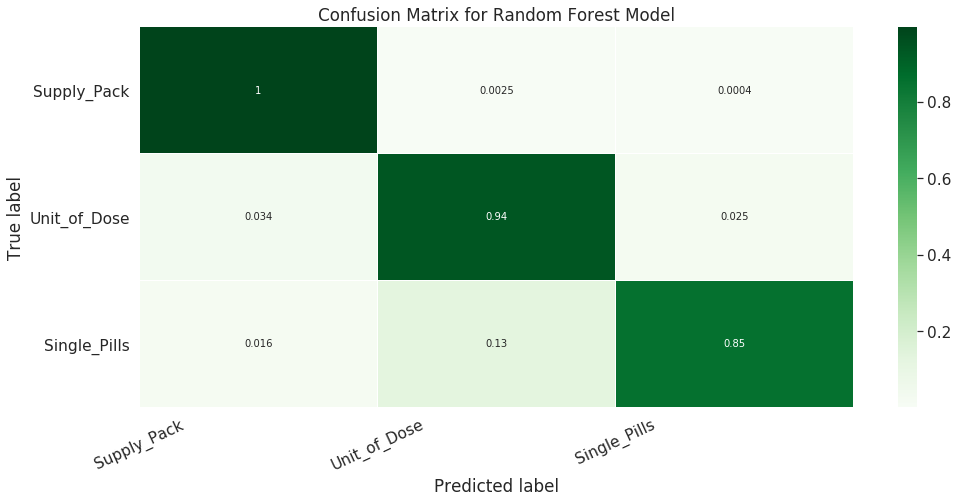

In [244]:
#plot_confusion_matrix(classifier, X, Y)
import seaborn as sns
# Get and reshape confusion matrix data
matrix = confusion_matrix(Y_Test, Y_Pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Supply_Pack', 'Unit_of_Dose', 'Single_Pills']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [246]:
from sklearn.tree import export_graphviz
# Export as dot file
estimator = classifier.estimators_[10]
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = ['0','1','2'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
##call(['output', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
# This conversion was done directly in the command line by running the command dot -Tpng tree.dot -o tree.png

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [253]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

TypeError: '(slice(None, None, None), 0)' is an invalid key

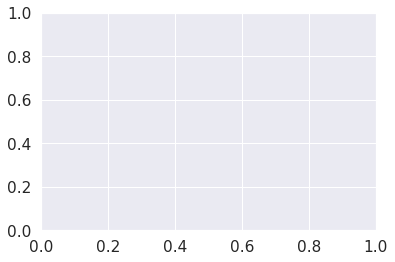

In [255]:
visualize_classifier(classifier, X, Y);

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

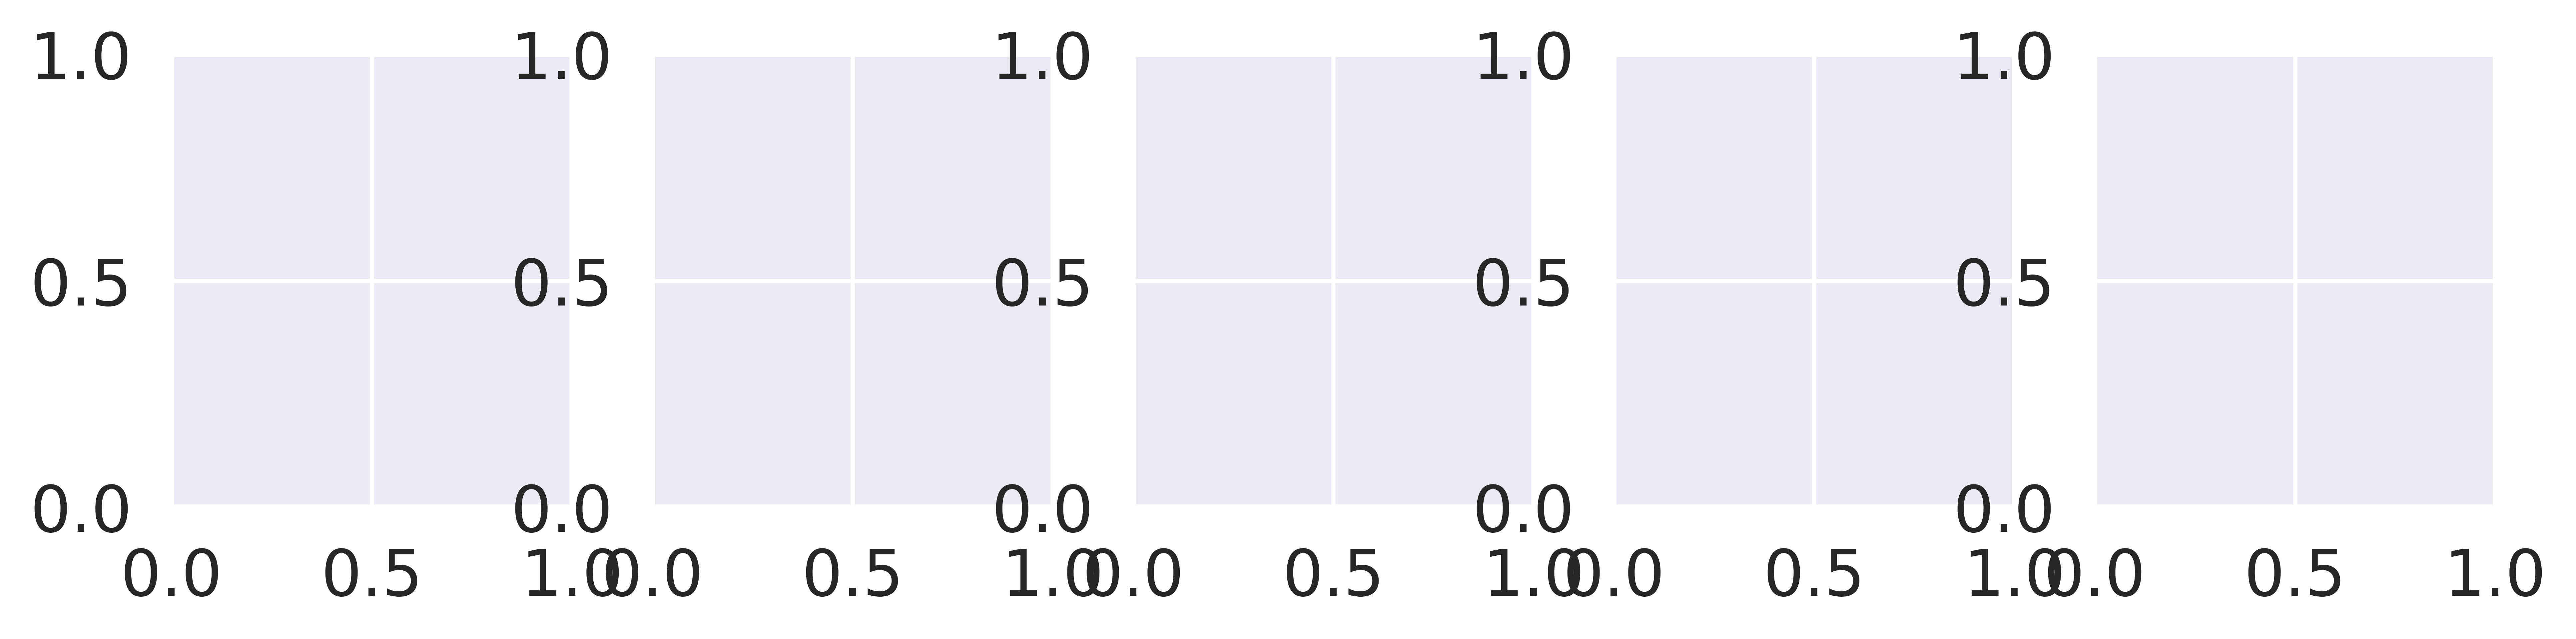

In [262]:
from sklearn import tree
fn=X.columns
cn=Y.unique()
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [263]:
import pickle

AttributeError: 'RandomForestClassifier' object has no attribute 'save'